In [77]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Cette partie est pour les client morales

In [7]:
mc_data = pd.read_csv('final-mc-data.csv', encoding='iso-8859-1', sep='\t')

In [42]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745203 entries, 0 to 2745202
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   COMAX       object 
 2   CTPE        int64  
 3   CORELB      int64  
 4   PCA-1       float64
 5   PCA-2       float64
 6   PCA-3       float64
 7   PCA-4       float64
 8   Cluster     int32  
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 178.0+ MB


In [8]:
clusters = 5
kmeans = KMeans(n_clusters=clusters, init='k-means++')

In [19]:
list(mc_data.columns)[2:]

['CTPE', 'CORELB', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4']

In [25]:
# WCSS: Within Cluster Sum of Squares
kmeans.fit(mc_data[list(mc_data.columns)[2:]])

KMeans(n_clusters=5)

In [27]:
# The clusters centers
kmeans.cluster_centers_

array([[ 1.05693541,  1.        , -1.55971681,  0.33181835, -0.02736587,
         0.09319771],
       [ 1.04683017,  1.00484928,  0.68133645, -1.10984564,  0.58266806,
         0.11030672],
       [ 1.07430159,  1.01395751,  2.14513052, -0.0528825 , -0.43757854,
        -0.45080165],
       [ 1.12522852,  1.00887356,  3.29115813,  1.54213951,  1.0726468 ,
         1.89054513],
       [ 1.05817807,  4.        , -1.53190126,  0.26499804, -0.17714686,
         0.11073502]])

In [28]:
mc_data['Cluster'] = kmeans.labels_

In [31]:
mc_data.head()

,Unnamed: 0,COMAX,CTPE,CORELB,PCA-1,PCA-2,PCA-3,PCA-4,Cluster
0,0,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
1,1,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
2,2,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
3,3,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
4,4,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0


In [38]:
mc_data[['COMAX', 'CTPE', 'CORELB', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4']].to_csv('mc-clusters.csv', sep='\t')

In [35]:
mc_data['Cluster'].value_counts()

0    883814
1    800905
2    614068
4    263749
3    182667
Name: Cluster, dtype: int64

In [61]:
mc_data[mc_data.CORELB == 1]

,Unnamed: 0,COMAX,CTPE,CORELB,PCA-1,PCA-2,PCA-3,PCA-4,Cluster
0,0,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
1,1,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
2,2,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
3,3,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
4,4,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0
...,...,...,...,...,...,...,...,...,...
2745198,3342706,2ac6fa94b8,1,1,0.600369,0.572224,0.131148,-1.459051,2
2745199,3342707,2ac6fa94b8,1,1,0.600369,0.572224,0.131148,-1.459051,2
2745200,3342708,2ac6fa94b8,1,1,0.600369,0.572224,0.131148,-1.459051,2
2745201,3342709,2ac6fa94b8,1,1,0.600369,0.572224,0.131148,-1.459051,2


# Cette partie est pour les client physiques

In [64]:
pc_data = pd.read_csv('final-pc-data.csv', encoding='iso-8859-1', sep='\t')

In [65]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563910 entries, 0 to 563909
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  563910 non-null  int64  
 1   COMAX       563910 non-null  object 
 2   AGE         563910 non-null  int64  
 3   COSEXE      563910 non-null  int64  
 4   CTSCPI      563910 non-null  int64  
 5   PCA-1       563910 non-null  float64
 6   PCA-2       563910 non-null  float64
 7   PCA-3       563910 non-null  float64
 8   PCA-4       563910 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ MB


In [68]:
kmeans = KMeans(n_clusters=clusters, init='k-means++')
list(pc_data.columns)[2:]

['AGE', 'COSEXE', 'CTSCPI', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4']

In [70]:
# WCSS: Within Cluster Sum of Squares
kmeans.fit(pc_data[list(pc_data.columns)[2:]])

KMeans(n_clusters=5)

In [71]:
# The clusters centers
kmeans.cluster_centers_

array([[ 3.33675904e+01,  5.72420903e-01,  8.44061572e+03,
        -8.23071672e-01, -2.54168077e-01,  3.55185197e-02,
         1.29907270e-01],
       [ 4.68341021e+01,  4.94404926e-01,  4.11450411e+03,
         6.59149241e-01, -7.14866119e-02,  7.88196374e-02,
         1.73697066e-01],
       [ 4.96973765e+01,  3.10682111e-01,  2.26488862e+03,
         2.10897651e-01,  2.16644450e-01, -3.92196098e-02,
         5.71621371e-02],
       [ 4.47574689e+01,  5.03303350e-01,  5.55983817e+03,
         5.47992680e-01, -4.73063189e-02,  1.57790521e-02,
         7.02074641e-02],
       [ 7.37851422e+01,  4.48758723e-01,  7.40600986e+03,
        -1.70922859e-02,  3.49292425e-01, -9.19056029e-02,
        -3.94340928e-01]])

In [72]:
pc_data['Cluster'] = kmeans.labels_

In [73]:
pc_data.head()

,Unnamed: 0,COMAX,AGE,COSEXE,CTSCPI,PCA-1,PCA-2,PCA-3,PCA-4,Cluster
0,0,6e3a2b9fa1,55,1,4600,-1.619473,0.067995,-0.194275,0.193045,1
1,1,1b44a67f61,41,0,4700,1.949925,-1.234185,0.496042,-1.358579,1
2,4,bdf1f63a98,32,1,3500,0.942095,-1.936260,-0.874105,0.548765,1
3,6,bc9f2a4a5c,23,1,8400,2.479900,-1.195938,-0.545192,-0.405637,0
4,8,deb8a278df,13,0,8400,-2.122563,0.176458,0.209005,0.432681,0


In [74]:
pc_data[['COMAX', 'AGE', 'COSEXE', 'CTSCPI', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4']].to_csv('pc-clusters.csv', sep='\t')

In [76]:
pc_data['Cluster'].value_counts()

0    162964
4    127973
3    127295
1     95173
2     50505
Name: Cluster, dtype: int64

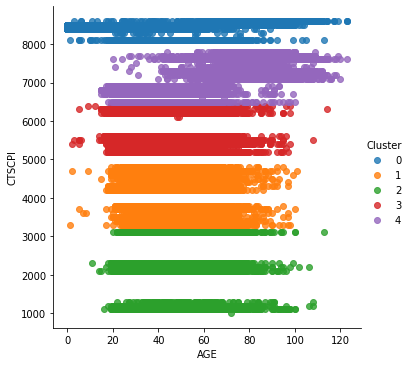

In [93]:
sns.lmplot(x='AGE', y='CTSCPI', data=pc_data, hue='Cluster',fit_reg=False)

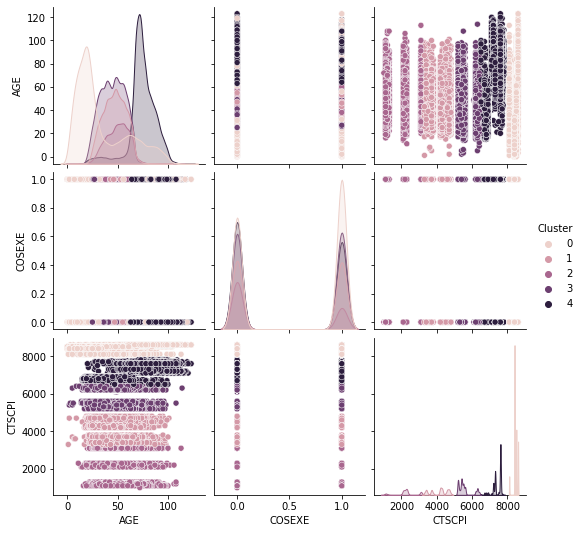

In [96]:
sns.pairplot(pc_data[['AGE', 'COSEXE', 'CTSCPI', 'Cluster']],hue='Cluster')